In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Load the new CSV file to examine its contents
file_path_new = '/Users/cheimamezdour/Projects/PFE/DQN-ITSCwPD/logs/test/J7_TLS/con/dataDuelingDoubleDQNAgent_lr0.0001.csv'
data_new = pd.read_csv(file_path_new)

# Display the first few rows of the new dataframe to understand its structure
data_new.head()


,l,r,id,ep,con_p_rate,ctrl_con_p_rate,veh_n_p_hour,veh_n,sum_delay,sum_waiting_time,...,avg_acc_waiting_time,avg_queue_length,densities,flows,ramp_queue_lengths,total_density,total_flow,total_ramp_queue_length,TimeLimit.truncated,done
0,781,45419.106880,rlcontroller,1,0.060,0.060,"[1100.0, 1100.0, 1300.0, 600.0]",12,11.645578,33.0,...,9.416667,1.2,"{'ramp12': 0.07598784194528876, 'ramp14': 0.09...","{'ramp12': 3, 'ramp14': 3, 'ramp16': 3}","{'ramp12': 4, 'ramp14': 4, 'ramp16': 4}",0.254089,9,12,False,True
1,786,44002.757868,rlcontroller,2,0.108,0.108,"[1400.0, 1500.0, 1100.0, 1500.0]",11,10.234399,14.0,...,5.545455,1.2,"{'ramp12': 0.10131712259371835, 'ramp14': 0.06...","{'ramp12': 4, 'ramp14': 2, 'ramp16': 3}","{'ramp12': 3, 'ramp14': 3, 'ramp16': 3}",0.248696,9,9,False,True
2,781,44289.044330,rlcontroller,3,0.124,0.124,"[1500.0, 800.0, 1400.0, 700.0]",12,11.576710,61.0,...,10.833333,1.8,"{'ramp12': 0.12664640324214793, 'ramp14': 0.12...","{'ramp12': 5, 'ramp14': 4, 'ramp16': 4}","{'ramp12': 13, 'ramp14': 13, 'ramp16': 13}",0.364115,13,39,False,True
3,789,43811.565838,rlcontroller,4,0.998,0.998,"[1100.0, 900.0, 1500.0, 700.0]",11,10.362243,4.0,...,5.636364,0.6,"{'ramp12': 0.12664640324214793, 'ramp14': 0.09...","{'ramp12': 5, 'ramp14': 3, 'ramp16': 3}","{'ramp12': 3, 'ramp14': 3, 'ramp16': 3}",0.304748,11,9,False,True
4,773,43076.002968,rlcontroller,5,0.717,0.717,"[900.0, 1200.0, 1200.0, 900.0]",11,10.734946,71.0,...,13.363636,1.6,"{'ramp12': 0.12664640324214793, 'ramp14': 0.12...","{'ramp12': 5, 'ramp14': 4, 'ramp16': 4}","{'ramp12': 13, 'ramp14': 13, 'ramp16': 13}",0.364115,13,39,False,True


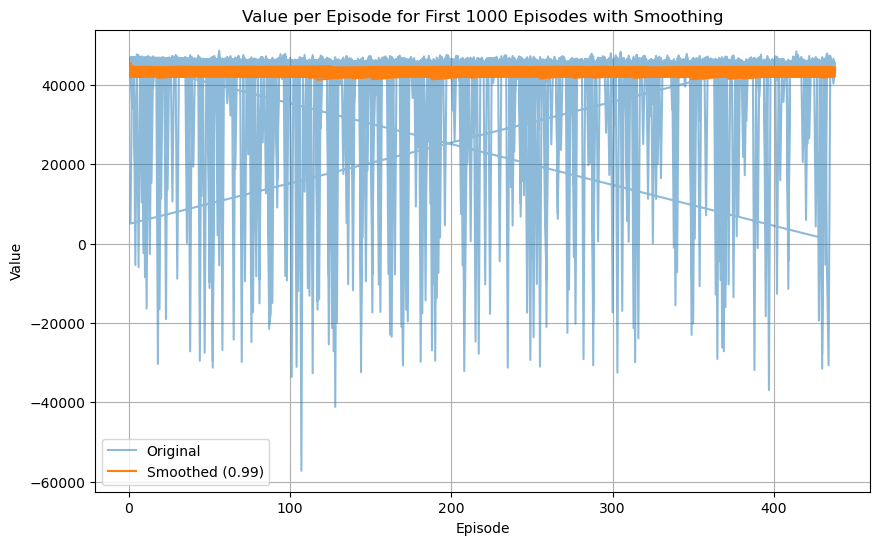

In [3]:
# Filter the data to include only the first 1000 episodes
data_1000_episodes = data_new[data_new['ep'] <= 1000]

# Calculate the exponential moving average (EMA) for smoothing
smoothing_factor = 0.99
smoothed_values_1000 = data_1000_episodes['r'].ewm(alpha=1-smoothing_factor).mean()

# Plot the original and smoothed Value per Episode for the first 1000 episodes
plt.figure(figsize=(10, 6))
plt.plot(data_1000_episodes['ep'], data_1000_episodes['r'], linestyle='-', alpha=0.5, label='Original')
plt.plot(data_1000_episodes['ep'], smoothed_values_1000, linestyle='-', label='Smoothed (0.99)')
plt.title('Value per Episode for First 1000 Episodes with Smoothing')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


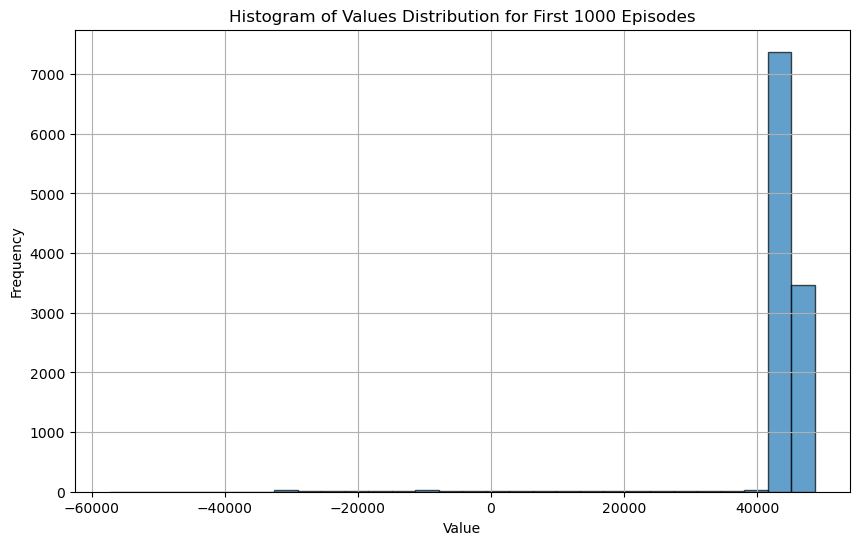

In [4]:
# Plot a histogram of the values distribution for the first 1000 episodes
plt.figure(figsize=(10, 6))
plt.hist(data_1000_episodes['r'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Values Distribution for First 1000 Episodes')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [7]:
# Calculate the average value over the first 1000 episodes
average_value = data_1000_episodes['r'].mean()
average_value


43518.2696074384

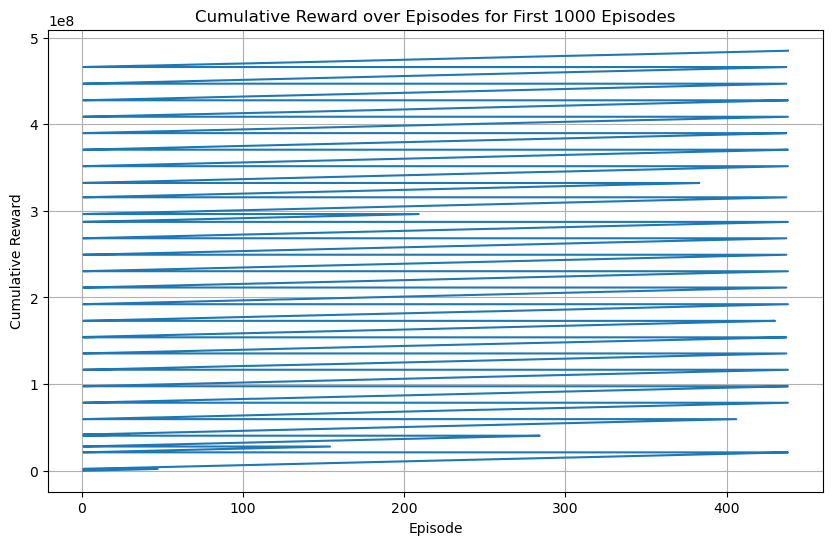

In [8]:
# Calculate the cumulative reward over episodes
data_1000_episodes['cumulative_reward'] = data_1000_episodes['r'].cumsum()

# Plot cumulative reward over episodes
plt.figure(figsize=(10, 6))
plt.plot(data_1000_episodes['ep'], data_1000_episodes['cumulative_reward'], linestyle='-')
plt.title('Cumulative Reward over Episodes for First 1000 Episodes')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.grid(True)
plt.show()


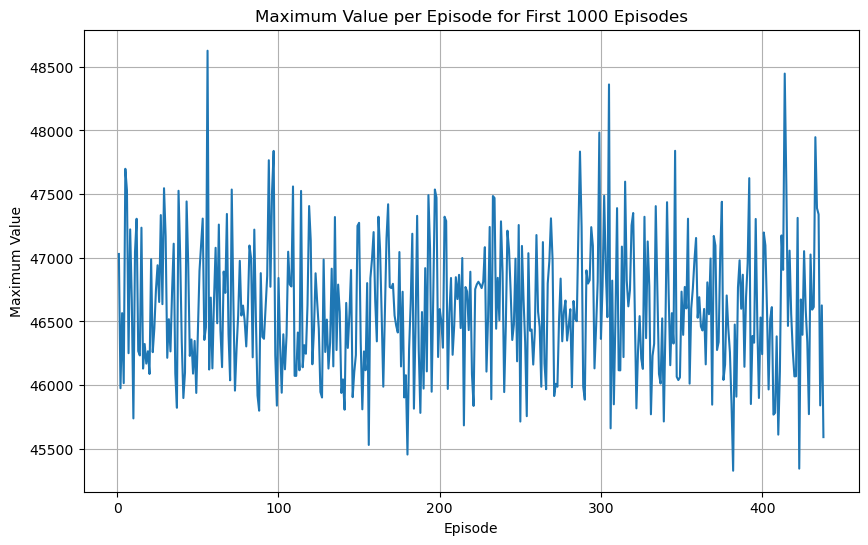

In [9]:
# Group by episode and find the maximum value per episode
max_value_per_episode = data_1000_episodes.groupby('ep')['r'].max()

# Plot the maximum value per episode
plt.figure(figsize=(10, 6))
plt.plot(max_value_per_episode.index, max_value_per_episode.values, linestyle='-')
plt.title('Maximum Value per Episode for First 1000 Episodes')
plt.xlabel('Episode')
plt.ylabel('Maximum Value')
plt.grid(True)
plt.show()
